In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
from google.colab import drive

In [5]:
dataset = pd.read_csv('/content/IMDb Movies India.csv' , encoding = 'ISO-8859-1')
dataset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [7]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [18]:
dataset.describe()

,Rating,Votes
count,4482.000000,4482.000000
mean,5.842146,161.174922
std,1.367966,220.266164
min,1.600000,5.000000
25%,4.900000,21.000000
50%,6.000000,58.000000
75%,6.800000,203.750000
max,10.000000,999.000000


In [17]:
attribute=dataset.columns
print(attribute)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [16]:
shape=dataset.shape
print(f"Number of rows: {shape[0]},Number of columns: {shape[1]} ")

Number of rows: 4482,Number of columns: 10 


In [15]:
unique_genres = dataset['Genre'].unique()
print("Unique Genres:",unique_genres)

Unique Genres: ['Drama' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Horror, Mystery, Thriller' 'Action, Crime, Thriller' 'Horror'
 'Horror, Romance, Thriller' 'Comedy, Drama, Romance'
 'Crime, Drama, Mystery' 'Horror, Thriller' 'Comedy, Horror' 'Action'
 'Thriller' 'Comedy' 'Adventure, Horror, Mystery'
 'Crime, Mystery, Thriller' 'Drama, History' 'Sport'
 'Biography, Drama, History' 'Horror, Romance' 'Adventure, Drama'
 'Action, Drama, History' 'Drama, Romance' 'Crime, Thriller'
 'Drama, Family, Musical' 'Action, Comedy' 'Action, Adventure, Fantasy'
 'Comedy, Drama' 'Documentary' 'Drama, Horror, Musical'
 'Action, Biography, Drama' 'Adventure, Drama, Mystery'
 'Mystery, Thriller' 'Crime, Drama' 'Documentary, Biography'
 'Horror, Mystery' 'Drama, Horror, Romance' 'Romance'
 'Action, Sci-Fi, Thriller' 'Action, Drama, Romance' 'Mystery, Romance'
 'Fantasy' 'Comedy, Crime, Drama' 'Action, Crime, Drama'
 'Drama, Romance, Thriller' 'Drama, Family' 'Musical, Romance'
 'Action, Comedy, Drama'

In [14]:
rating_dist = dataset['Rating'].value_counts()
print("Rating distribution:",rating_dist)

Rating distribution: 6.5     164
6.8     162
6.2     155
6.4     136
6.6     135
       ... 
1.6       2
2.2       2
1.8       2
9.7       1
10.0      1
Name: Rating, Length: 81, dtype: int64


In [13]:
attributes = ['Name','Year','Duration','Votes','Rating']
dataset.dropna(subset=attributes, inplace=True)
missing_val = dataset.isna().sum()
print(missing_val)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     162
dtype: int64


In [12]:
movie_name_rating=dataset[['Name','Rating']]
print(movie_name_rating.head())

                                 Name  Rating
0                                         NaN
1  #Gadhvi (He thought he was Gandhi)     7.0
2                         #Homecoming     NaN
3                             #Yaaram     4.4
4                   ...And Once Again     NaN


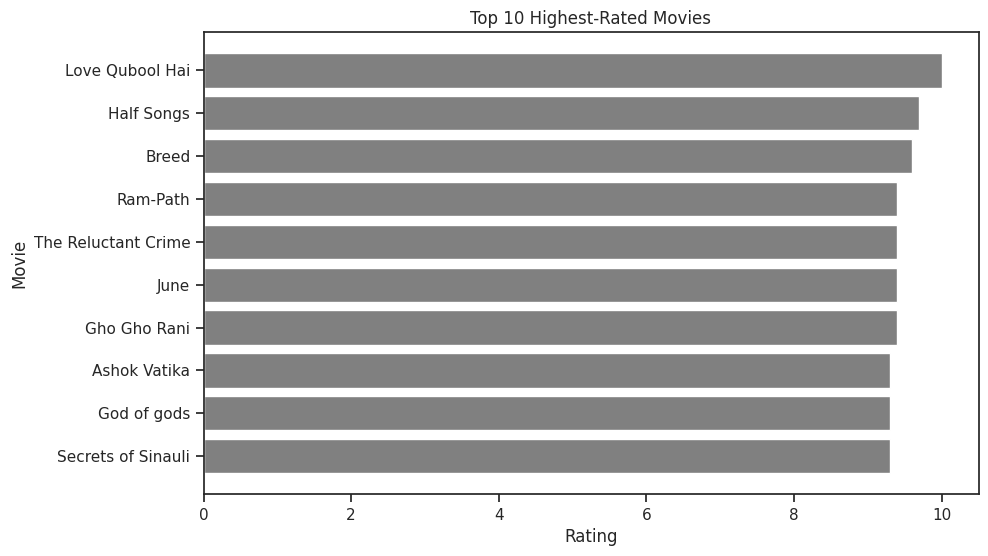

In [11]:
top_rated_movies = dataset. sort_values(by = 'Rating', ascending = False).head(10)
plt.figure(figsize = (10, 6))
plt.barh(top_rated_movies['Name'], top_rated_movies['Rating'],color = 'Grey')
plt.xlabel ('Rating')
plt.ylabel ('Movie')
plt.title("Top 10 Highest-Rated Movies")
plt.gca(). invert_yaxis()
plt. show()

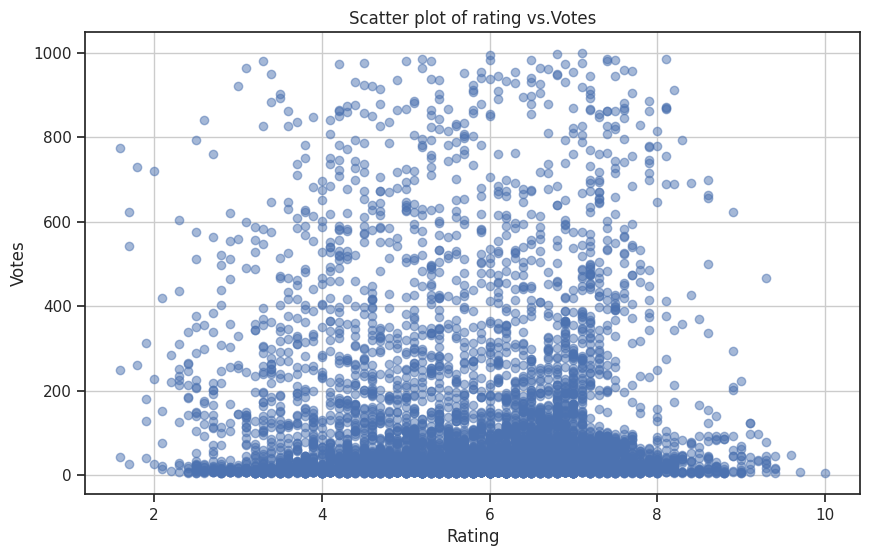

In [10]:
 dataset['Votes'] = pd.to_numeric(dataset['Votes'], errors= 'coerce')
 plt.figure(figsize=(10,6))
 plt.scatter(dataset['Rating'], dataset['Votes'], alpha = 0.5, color = 'b')
 plt.xlabel('Rating')
 plt.ylabel('Votes')
 plt.title('Scatter plot of rating vs.Votes')
 plt.grid(True)
 plt.show()

<ipython-input-9-002363736802>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Number of Movies', y='Actor', data = actor_counts.head(10), palette = 'viridis')


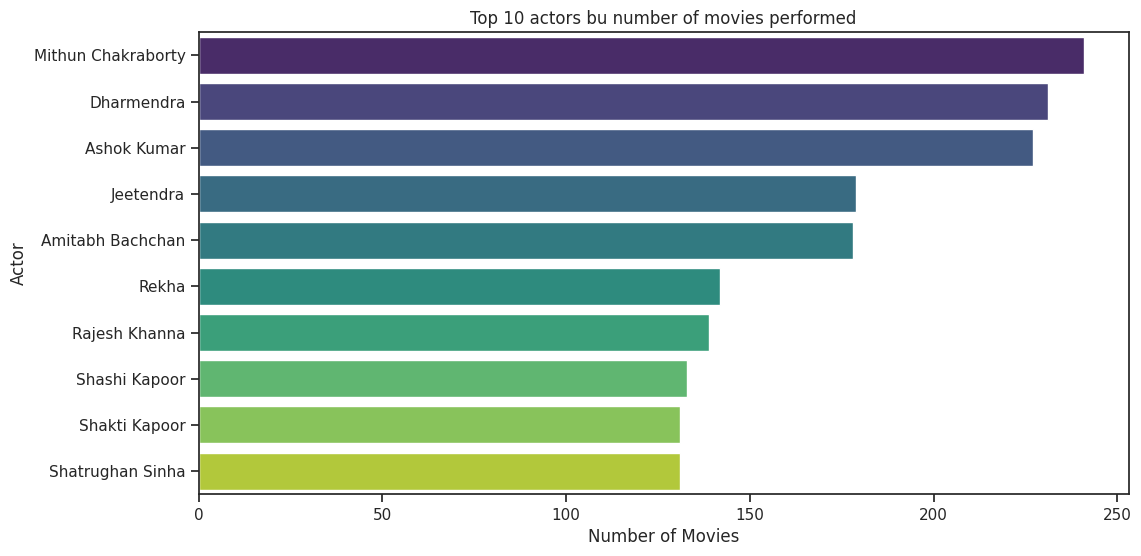

In [9]:
actors = pd.concat([dataset['Actor 1'], dataset['Actor 2'], dataset['Actor 3'],])
actor_counts = actors.value_counts().reset_index()
actor_counts.columns = ['Actor', 'Number of Movies']
plt.figure(figsize = (12,6))
sns.barplot(x= 'Number of Movies', y='Actor', data = actor_counts.head(10), palette = 'viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 10 actors bu number of movies performed')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


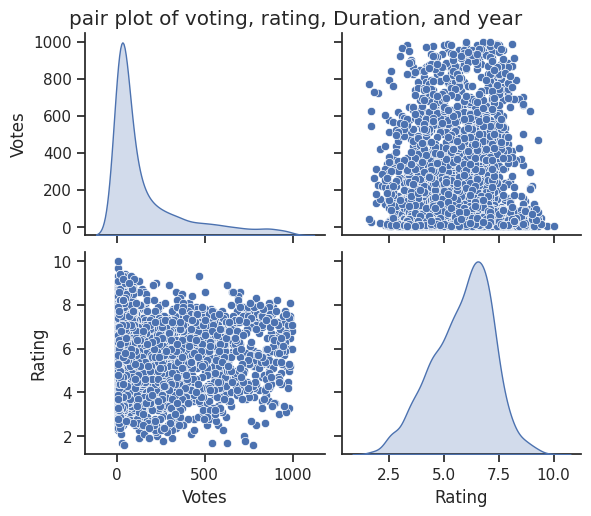

In [21]:
columns_of_interest = ['Votes', 'Rating', 'Duration', 'Year']
sns.set(style = 'ticks')
sns.pairplot(dataset[columns_of_interest], diag_kind = 'kde', markers = 'o', palette = 'viridis', height = 2.5, aspect = 1.2)
plt.suptitle('pair plot of voting, rating, Duration, and year', y = 1.02)
plt.show()

In [22]:
dataset_sorted = dataset.sort_values(by = 'Votes', ascending = False)
dataset_sorted['Vote_Count_Percentile'] = dataset_sorted['Votes'].rank(pct = True)* 100
dataset_sorted.reset_index(drop = True, inplace = True)
print(dataset_sorted[['Name', 'Votes', 'Vote_Count_Percentile']])

                                       Name  Votes  Vote_Count_Percentile
0      Satyam Shivam Sundaram: Love Sublime  999.0             100.000000
1                                Hera Pheri  998.0              99.977689
2                               Kurukshetra  996.0              99.955377
3                               Dishkiyaoon  986.0              99.933066
4                                Kadvi Hawa  985.0              99.899598
...                                     ...    ...                    ...
4477                               Manchala    5.0               0.535475
4478                      Do Nambar Ke Amir    5.0               0.535475
4479  Indradhanush, the Grey Shades of Love    5.0               0.535475
4480                          Anyay Abichar    5.0               0.535475
4481              Cartography of Loneliness    5.0               0.535475

[4482 rows x 3 columns]


In [23]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [25]:
dataset['Year'] = dataset['Year'].astype(str)
dataset['Duration'] = dataset['Duration'].astype(str)
dataset['Year'] = dataset['Year'].str.extract('(/d+)').astype(float)
dataset['Duration'] = dataset['Duration'].str.extract('(/d+)').astype(float)
X = dataset[['Year', 'Duration', 'Votes']]
y = dataset['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
model = LinearRegression()

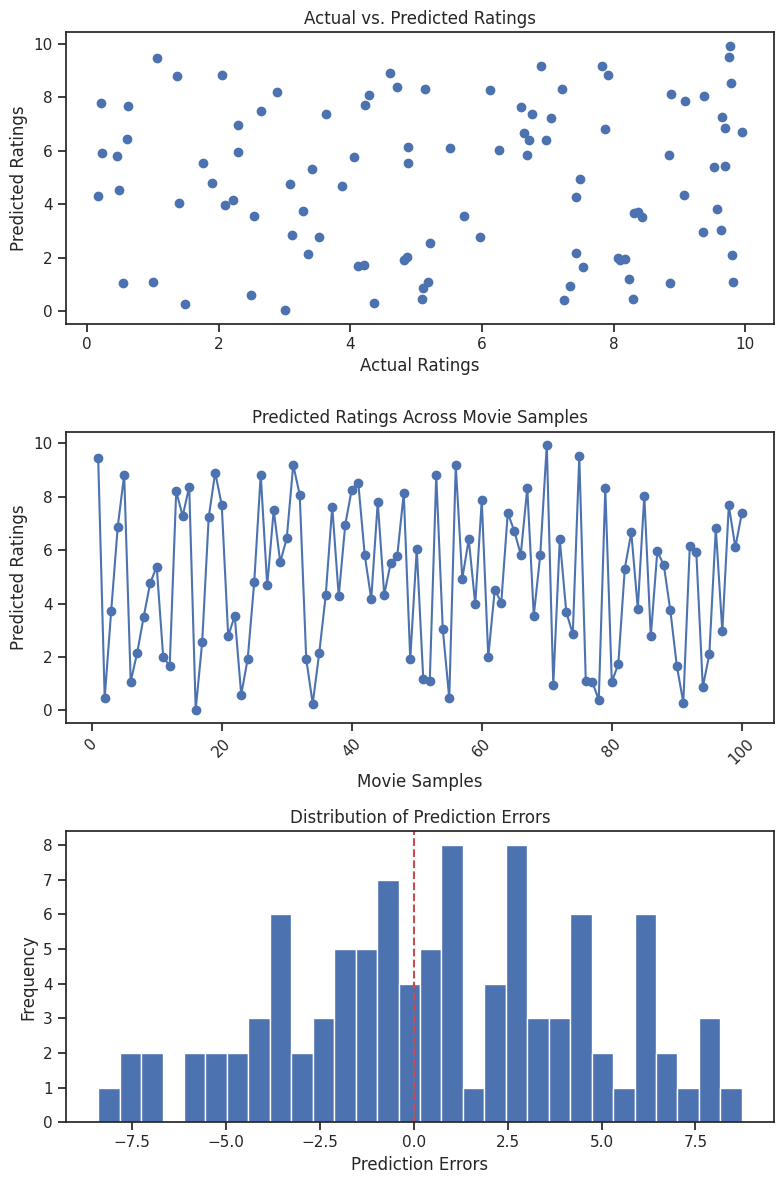

In [36]:
y_test = np.random.rand(100) * 10
y_pred = np.random.rand(100) * 10
errors = y_test - y_pred
fig, axs = plt. subplots(3, 1, figsize = (8, 12))
axs [0].scatter (y_test, y_pred)
axs [0].set_xlabel("Actual Ratings")
axs [0].set_ylabel ("Predicted Ratings")
axs [0].set_title("Actual vs. Predicted Ratings")
# Line plot
movie_samples = np.arange(1, len(y_pred) + 1)
axs [1].plot(movie_samples, y_pred, marker = 'o', linestyle = '-')
axs [1].set_xlabel ("Movie Samples")
axs [1].set_ylabel ("Predicted Ratings")
axs [1].set_title("Predicted Ratings Across Movie Samples")
axs [1].tick_params(axis = 'x', rotation = 45)
# Histogram
axs [2].hist(errors, bins = 30)
axs [2].set_xlabel("Prediction Errors")
axs [2].set_ylabel ("Frequency")
axs [2].set_title("Distribution of Prediction Errors")
axs [2].axvline(x = 0, color = 'r', linestyle = '--')
plt. tight_layout ()
plt. show()